In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os 
import glob # 
import shutil # file operations such as copy 

import matplotlib.pyplot as plt 


In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# download a file from URL
zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)


In [3]:
data_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
# data_dir

In [4]:
!ls -l ~/.keras/datasets/flower_photos

total 896
-rw-r-----    1 adeela  staff  418049 Feb  8  2016 LICENSE.txt
drwx------  635 adeela  staff   20320 Feb 10  2016 daisy
drwx------  900 adeela  staff   28800 Feb 10  2016 dandelion
drwx------  643 adeela  staff   20576 Feb 10  2016 roses
drwx------  701 adeela  staff   22432 Feb 10  2016 sunflowers
drwxr-xr-x    7 adeela  staff     224 Aug 28 17:08 train
drwx------  801 adeela  staff   25632 Feb 10  2016 tulips
drwxr-xr-x    7 adeela  staff     224 Aug 28 17:08 val


In [5]:
daisy_dir = os.path.join(data_dir, 'daisy')
dandelion_dir = os.path.join(data_dir, 'dandelion')
roses_dir = os.path.join(data_dir, 'roses')
sunflowers_dir = os.path.join(data_dir, 'sunflowers')
tulips_dir = os.path.join(data_dir, 'tulips')

In [6]:
total_daisy = len(os.listdir(daisy_dir))
total_dandelion = len(os.listdir(dandelion_dir))
total_roses = len(os.listdir(roses_dir))
total_sunflowers = len(os.listdir(sunflowers_dir))
total_tulips = len(os.listdir(tulips_dir))

total_data = total_daisy + total_dandelion + total_roses + total_sunflowers + total_tulips

In [7]:
print("Total data {} \n\nDaisy : {}  \nDandelion : {}  \nRoses : {}  \nSunflowers : {}  \nTulips : {}".format(total_data, 
                                                                                                    total_daisy, 
                                                                                                    total_dandelion,
                                                                                                    total_roses,
                                                                                                    total_sunflowers, 
                                                                                                     total_tulips))

Total data 3670 

Daisy : 633  
Dandelion : 898  
Roses : 641  
Sunflowers : 699  
Tulips : 799


## Create Test and Train Data

In [8]:
flower_classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [9]:
# for c in flower_classes:
#     img_path = os.path.join(data_dir,c)
#     images = glob.glob(img_path + '/*.jpg')  # get path of image files 
#     train, val = images[0:round(len(images)*0.8)] , images[round(len(images)*0.8): ] # spilt into train and validation
    
    
#     for t in train:
#         if not os.path.exists(os.path.join(data_dir, 'train', c)):  
#             os.makedirs(os.path.join(data_dir, 'train', c))
#         shutil.move(t, os.path.join(data_dir, 'train', c))
        
#     for v in val:
#         if not os.path.exists(os.path.join(data_dir, 'val', c)):  
#             os.makedirs(os.path.join(data_dir, 'val', c))
#         shutil.move(v, os.path.join(data_dir, 'val', c))



In [10]:
train_dir = os.path.join(data_dir , 'train')
val_dir = os.path.join(data_dir , 'val')

## Data Prep

In [11]:
IMG_SIZE = 150
BATCH_SIZE=100

In [12]:
train_img_gen = ImageDataGenerator(rescale=1./255, 
                                  zoom_range=0.6, 
                                  rotation_range=45,
                                  horizontal_flip=True,
                                  vertical_flip=True)

train_data_gen = train_img_gen.flow_from_directory(
                                          directory= train_dir,
                                          batch_size=BATCH_SIZE, 
                                          target_size = (IMG_SIZE, IMG_SIZE), 
                                          shuffle=True,
                                          class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [13]:
val_img_gen = ImageDataGenerator(rescale=1./255)

val_data_gen = val_img_gen.flow_from_directory(directory=val_dir, 
                                              batch_size= BATCH_SIZE,
                                              target_size=(IMG_SIZE,IMG_SIZE),
                                              shuffle=True,
                                              class_mode='sparse')

Found 735 images belonging to 5 classes.


In [14]:
sample_data , label = next(train_data_gen)

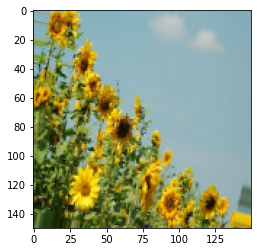

In [15]:
plt.imshow(sample_data[0])
plt.show()

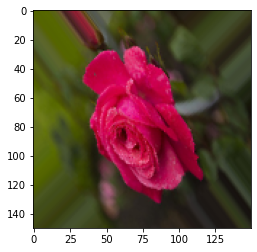

In [16]:
plt.imshow(sample_data[1])
plt.show()

## Create Model

In [17]:
l0 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3))
l1 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l2 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')
l3 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l4 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')
l5 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l6 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')
l7 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l8 = tf.keras.layers.Flatten()
l9 = tf.keras.layers.Dropout(0.5)
l10 = tf.keras.layers.Dense(units=64, activation='relu')
l11 = tf.keras.layers.Dense(units=5, activation='softmax')


model = tf.keras.Sequential([l0, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'],
             optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

## Train Model

In [18]:
EPOCHS = 10
history = model.fit_generator(
                    train_data_gen, 
                    steps_per_epoch=int(np.ceil(train_data_gen.n/BATCH_SIZE)),
                    epochs=EPOCHS,
                    validation_data=val_data_gen,
                    validation_steps=int(np.ceil(val_data_gen.n/BATCH_SIZE))
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
30/30 [==============================] - 45s 1s/step - loss: 1.4575 - accuracy: 0.3339 - val_loss: 1.2469 - val_accuracy: 0.4626
Epoch 2/10
30/30 [==============================] - 47s 2s/step - loss: 1.1664 - accuracy: 0.5060 - val_loss: 1.1399 - val_accuracy: 0.5483
Epoch 3/10
30/30 [==============================] - 44s 1s/step - loss: 1.0821 - accuracy: 0.5642 - val_loss: 1.0431 - val_accuracy: 0.5850
Epoch 4/10
30/30 [==============================] - 43s 1s/step - loss: 1.0339 - accuracy: 0.5731 - val_loss: 1.0006 - val_accuracy: 0.5986
Epoch 5/10
30/30 [==============================] - 44s 1s/step - loss: 0.9775 - accuracy: 0.5928 - val_loss: 1.0024 - val_accuracy: 0.6068
Epoch 6/10
30/30 [==============================] - 44s 1s/step - loss: 0.9434 - accuracy: 0.6259 - val_loss: 1.0156 - val_accuracy: 0.6259
Epoch 7/10
30/30 [==============================] - 44s 1s/step - loss: 0.8783 - acc

## 

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_rng = range(EPOCHS)

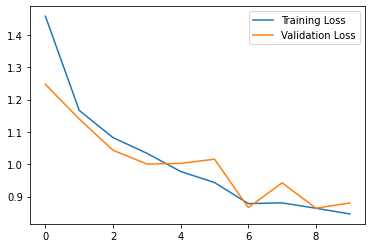

In [23]:
plt.plot(epoch_rng, loss, label='Training Loss')
plt.plot(epoch_rng, val_loss, label='Validation Loss')

plt.legend()

plt.show()

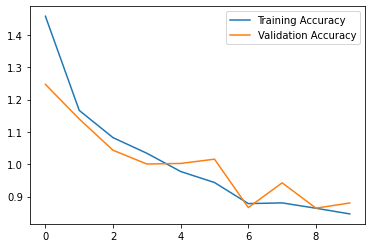

In [24]:
plt.plot(epoch_rng, loss, label='Training Accuracy')
plt.plot(epoch_rng, val_loss, label='Validation Accuracy')

plt.legend()

plt.show()